# Section 7: Cámara Chilena de la Construcción

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import count
import numpy as np
import codecs

## A. Writing Json file with format 
def write_json_UTF8(jsonDir, name_file):
    with open(name_file, 'w') as outfile:
        json.dump(jsonDir, outfile, ensure_ascii=False)
    with codecs.open(name_file, 'r', encoding = "iso-8859-1") as file:
          lines = file.read()
    with codecs.open(name_file, 'w', encoding = 'utf8') as file:
          file.write(lines)
    print("CREATED: ", name_file)

## B. Fixing numbers    
def repair_num(value):
    try:
        aux = float(value)
    except:
        "Existe algun signo"
        aux = ""
        for letra in str(value):
            if letra.isdigit():
                aux = aux+letra
            elif letra == ".":
                aux = aux+letra
        if aux == "":
            pass

    return float(aux)

## C. Formating Json
def DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm=False):

    globalDir = {}
    anioInit = -999
    listData = []
    dirData = {}
    initDir = True
    df_norm = None
    if norm:
        df_copy = df.copy()
        df_norm = (df_copy[varible_v]-df_copy[varible_v].min()) / \
            (df_copy[varible_v].max()-df_copy[varible_v].min())

    for i, anio, mes, var_value in zip(count(), df["anio"], df["mesSTR"], df[varible_v]):
        try:
            anio = int(anio)
        except:
            print("set:", anio)
            listData.append(dirData)
            break

        # Si todas son nan no sirve
        L = 0
        for index, v_reg in enumerate(varible_v):
            if str(df[v_reg].values[i]) == "nan":
                L = L+1
        if L == len(varible_v):
            print("allNone", anio)
            continue

        if anioInit < anio:
            if anioInit > 0:
                listData.append(dirData)
                dirData = {}
                initDir = True

        if initDir:
            dirData["anio"] = anio
            dirData["regiones"] = {}
            for index, v_reg in enumerate(varible_v):
                dirData["regiones"][reg_name[index]] = {"meses": {}}

            initDir = False

        for index, v_reg in enumerate(varible_v):
            dirData["regiones"][reg_name[index]]["meses"][mes] = {}

        for index, v_reg in enumerate(varible_v):
            # dirData["regiones"][reg_name[index]]["meses"][mes]["indicar_principal"]=df[v_reg].values[i]
            if norm:
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index]] = round(
                    float(df_norm[v_reg].values[i]), 4)
                if (df_norm[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            else:
                # si no hayd data
                data_value = repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" or len(str(data_value).lower()) == 0:
                    data_value = 0
                if data_value - int(data_value) > 0.0001:
                    data_value = round(data_value, 1)
                else:
                    data_value = int(data_value)
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes][variable_meaning[index]] = data_value
                if (df[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            if len(toolTip_v[index]) > 0:
                toolTip_values = [str(df[x].values[i])
                                  for x in toolTip_v[index]]
                tip = {}
                #print(index, v_reg, i, df[v_reg].values[i])
                data_value = repair_num(df[v_reg].values[i])

                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                # add data to tooltipe

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]

                for indexTool, name in enumerate(toolTip_mening[index]):
                    if str(toolTip_values[indexTool]).lower() == "nan":
                        tip[name] = "-"
                    else:
                        tip[name] = toolTip_values[indexTool]

                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
            else:

                tip = {}
                data_value = repair_num(df[v_reg].values[i])
                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]
                
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
                #old
                #dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"] ={}
        anioInit = anio

    return listData

## D. Creating image to download
sns.set()
def create_image(df, varible_v, variable_meaning, save_dir):
    print("img", varible_v, variable_meaning)
    objetive_var = varible_v
    plt.close()
    plt.clf()
    df['date'] = df["Mes"].map(str) + '-' + df["anio"].map(str)
    for value in df['date'] :
        df['date'] = pd.to_datetime(
        df['date'], format='%m-%Y').dt.strftime('%m-%Y')
    date = []
    val = []
    for i, value in enumerate(df[objetive_var]):
        if str(value) == "nan":
            continue
        else:
            value = repair_num(value)
            val.append(value)
            print((df['date'].values[i]))
            date.append(df['date'].values[i])

    df = pd.DataFrame(columns=['date', objetive_var])
    df['date'] = date
    df[objetive_var] = val
    fig, ax = plt.subplots()
    sns.set_style("darkgrid")
    print(len(df['date']), len(df[objetive_var]))
    ax = sns.lineplot(x=range(0, len(df['date'])), y=df[objetive_var])

    """
    max_xticks = 11
    xloc = plt.MaxNLocator(max_xticks)
    print(xloc)
    ax.xaxis.set_major_locator(xloc)
    """
    names = []
    print(len(df['date']))
    ran = int((len(df['date'])+.5)/10)
    if ran == 0:
        ran = 1
    if len(df['date']) / ran < 10:
        ran = 1
    names = [df['date'].values[d] for d in range(0, len(df['date']), ran)]
    ticklabels = names
    ax.set_xticks(range(0, len(df['date'])+1, ran))
    ax.set_xticklabels(ticklabels)
    fig.autofmt_xdate()
    plt.title(variable_meaning)
    plt.ylabel(variable_meaning)
    plt.savefig(save_dir, dpi=100)
    plt.show()
    
    
## E. Reading Data from API 
file='../01-Data/materiales.xlsx'
global_dir="../03-Graph"
norm=False# no normalizada
init_data_name="cchc_"
link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/materiales.xlsx"
link_img ="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
link_glosario="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header=[ {"titulo":None,"Fuente":None, "LinkDatosOriginales":None, 
               "comment":None, "linkPlot":None,"glosario":None}] 

### 1) cchc_01_materiales.json 

set: None
img Tons. Barras de Acero para Hormigón Barras de Acero [Ton]
01-1990
02-1990
03-1990
04-1990
05-1990
06-1990
07-1990
08-1990
09-1990
10-1990
11-1990
12-1990
01-1991
02-1991
03-1991
04-1991
05-1991
06-1991
07-1991
08-1991
09-1991
10-1991
11-1991
12-1991
01-1992
02-1992
03-1992
04-1992
05-1992
06-1992
07-1992
08-1992
09-1992
10-1992
11-1992
12-1992
01-1993
02-1993
03-1993
04-1993
05-1993
06-1993
07-1993
08-1993
09-1993
10-1993
11-1993
12-1993
01-1994
02-1994
03-1994
04-1994
05-1994
06-1994
07-1994
08-1994
09-1994
10-1994
11-1994
12-1994
01-1995
02-1995
03-1995
04-1995
05-1995
06-1995
07-1995
08-1995
09-1995
10-1995
11-1995
12-1995
01-1996
02-1996
03-1996
04-1996
05-1996
06-1996
07-1996
08-1996
09-1996
10-1996
11-1996
12-1996
01-1997
02-1997
03-1997
04-1997
05-1997
06-1997
07-1997
08-1997
09-1997
10-1997
11-1997
12-1997
01-1998
02-1998
03-1998
04-1998
05-1998
06-1998
07-1998
08-1998
09-1998
10-1998
11-1998
12-1998
01-1999
02-1999
03-1999
04-1999
05-1999
06-1999
07-1999
08-1999


<Figure size 432x288 with 0 Axes>

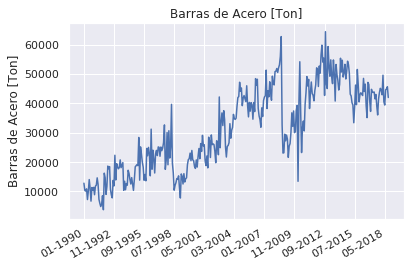

CREATED:  ../03-Graph/cchc_01_materiales.json


In [2]:
sheetname = 'Indice de Despacho Mat Const'
filename = "materiales.json"
full_file_name = '01_materiales'
info_header[0]["titulo"] = "Materiales"
info_header[0]["Fuente"] = "CCHC"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = info_header[0]["titulo"] 
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'Indice de Despacho Mat Const':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Tons. Barras de Acero para Hormigón",'Tons. Cemento',
                 'm3 Hormigón','Índ. Mensual despacho Mat construcc.']
    variable_meaning = ["Barras de Acero [Ton]",'Cemento [Ton]',
                 'Hormigón [m2]','Mat construcc. [ind]']
    reg_name = ["Barras de Acero",'Cemento',
                 'Hormigón','Mat construcc.']
    toolTip_v = [["% Var Acero prom acum",
                  "% Var Acero en 12 meses",
                  "Despacho Acero Acum. 12 meses (ton)"],
                 ['% Var Cemento mes',
                  '% Var Cemento en 12 meses',
                  'Despacho Cemento Acum. 12 meses (ton)'],
                 [ '% Var Hormigón mes',
                  '% Var Hormigón en 12 meses',
                  'Despacho Hormigón Acum. 12 meses (m3)'],
                 ['% Var Mat Const mes',
                  '% Var Mat Const en 12 meses',
                  'Despacho Mat Const Acum. 12 meses']]
    toolTip_mening =[["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file) 